<a href="https://colab.research.google.com/github/srfinley/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

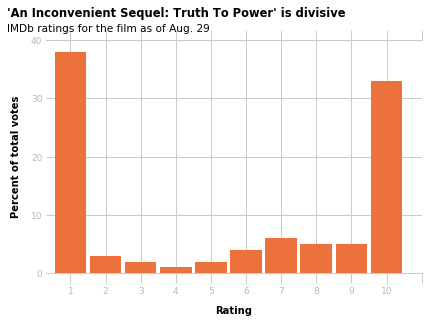

In [48]:
#538 stylesheet
plt.style.use('fivethirtyeight')

# make figure
fig = plt.figure()
fig.patch.set(facecolor='white')

#make axes
ax = fake.plot.bar(color='#ED713A', width=0.9)
ax.set(facecolor='white')

#axis labels
ax.set_ylabel("Percent of total votes",
             fontweight='bold',fontsize='10',
             labelpad=10)
ax.set_xlabel("Rating",
             fontweight='bold',fontsize='10',
             labelpad=10)

#customized title
ax.text(x=-1.8,y=44,
        s="'An Inconvenient Sequel: Truth To Power' is divisive",
       fontweight='bold',fontsize='11.5')
ax.text(x=-1.8,y=41.5,
        s="IMDb ratings for the film as of Aug. 29",
       fontsize='10.5')

#Tick labels
ax.set_xticks(range(0,11))
ax.set_xticklabels(range(1,11), rotation=0,
                  color="#B9B9B9",
                  fontsize='9')

ax.set_yticks(range(0,50,10))
ax.set_yticklabels(range(0, 50, 10),
                  color="#B9B9B9",
                  fontsize='9')

ax.tick_params(bottom=True, top=True, left=True, right=True)
ax.tick_params(axis="x", direction="out", length=10, width=1, color='#CBCBCB')

#spines
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_color('#CBCBCB')
ax.spines['top'].set_color('#CBCBCB')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

In [9]:
display(example)

In [49]:
#https://fivethirtyeight.com/features/how-actblue-is-trying-to-turn-small-donations-into-a-blue-wave/

url = 'https://fivethirtyeight.com/wp-content/uploads/2018/10/actblue-1.png?w=1150'
example2 = Image(url=url, width=400)

display(example2)

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/actblue-analysis/master/data/actblue_congress_contribs_by_day.csv")

df.head()

,Unnamed: 0,contribution_date,sum,count
0,0,2013-01-01,9878.94,167
1,1,2013-01-02,8158.56,304
2,2,2013-01-03,5105.80,201
3,3,2013-01-04,5070.50,159
4,4,2013-01-05,5453.94,140


In [54]:
#convert contribution date to datetime
df['contribution_date'] = df['contribution_date'].apply(pd.to_datetime)
df.head()

,Unnamed: 0,contribution_date,sum,count
0,0,2013-01-01,9878.94,167
1,1,2013-01-02,8158.56,304
2,2,2013-01-03,5105.80,201
3,3,2013-01-04,5070.50,159
4,4,2013-01-05,5453.94,140


In [55]:
#for each range of dates, we want the sum of count (for the green plot) 
#and the sum of sum (for the blue plot)

#filter each range into its own dataframe for summing
#three bins: 2013/14, 2015/16, 2017/18

#df1 = df[df['contribution_date'].year < 2015]
#^that's not working so let's try another way

def yearbin(datetime):
  if (datetime.year < 2015):
    return 1
  if (datetime.year > 2016):
    return 3
  return 2

df['yearbin'] = df['contribution_date'].apply(yearbin)
df.head()

,Unnamed: 0,contribution_date,sum,count,yearbin
0,0,2013-01-01,9878.94,167,1
1,1,2013-01-02,8158.56,304,1
2,2,2013-01-03,5105.80,201,1
3,3,2013-01-04,5070.50,159,1
4,4,2013-01-05,5453.94,140,1


In [56]:
df.tail()
#oh there's something bad on the end there

,Unnamed: 0,contribution_date,sum,count,yearbin
2095,2095,2018-09-27,3701844.73,66588,3
2096,2096,2018-09-28,6076516.70,125794,3
2097,2097,2018-09-29,5047416.55,106100,3
2098,2098,2018-09-30,10147367.59,182628,3
2099,2099,NaT,NaN,2,2


In [57]:
df = df.drop(index=2099)
df.tail()
#that's better

,Unnamed: 0,contribution_date,sum,count,yearbin
2094,2094,2018-09-26,3827073.88,58498,3
2095,2095,2018-09-27,3701844.73,66588,3
2096,2096,2018-09-28,6076516.70,125794,3
2097,2097,2018-09-29,5047416.55,106100,3
2098,2098,2018-09-30,10147367.59,182628,3


In [58]:
#split df into three sub-dfs for summing

df1 = df[df['yearbin'] == 1]
df2 = df[df['yearbin'] == 2]
df3 = df[df['yearbin'] == 3]

print(df1.head(),df2.head(),df3.head()) #looks good!

   Unnamed: 0 contribution_date      sum  count  yearbin
0           0        2013-01-01  9878.94    167        1
1           1        2013-01-02  8158.56    304        1
2           2        2013-01-03  5105.80    201        1
3           3        2013-01-04  5070.50    159        1
4           4        2013-01-05  5453.94    140        1      Unnamed: 0 contribution_date       sum  count  yearbin
730         730        2015-01-01  15734.66    675        2
731         731        2015-01-02  12930.65    517        2
732         732        2015-01-03  12727.61    503        2
733         733        2015-01-04  11095.88    328        2
734         734        2015-01-05   6175.11    384        2       Unnamed: 0 contribution_date        sum  count  yearbin
1461        1461        2017-01-01  130314.73   6321        3
1462        1462        2017-01-02   85383.15   3807        3
1463        1463        2017-01-03   81012.20   2831        3
1464        1464        2017-01-04  133044.17   33

In [61]:
print(df1.sum().loc['sum'], df1.sum().loc['count'])
#these correspond with the heights of the first two bars in the chart!

113951310.78 3361213.0


In [62]:
#put all the sums of count into a dataframe for the green plot
gdata = pd.Series([df1.sum().loc['count'],df2.sum().loc['count'],df3.sum().loc['count']],
                  index=["2014","'16","'18"])

gdata

2014     3361213.0
'16      6747187.0
'18     15272992.0
dtype: float64

In [64]:
#put all the sums of sum into a dataframe for the blue plot
bdata = pd.Series([df1.sum().loc['sum'],df2.sum().loc['sum'],df3.sum().loc['sum']],
                  index=["2014","'16","'18"])

bdata

2014    1.139513e+08
'16     2.221072e+08
'18     5.636850e+08
dtype: float64

In [0]:
from matplotlib.ticker import FixedLocator, FixedFormatter

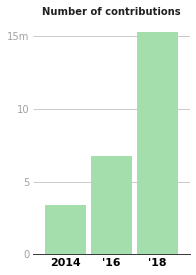

In [113]:
#now finally make the plots!

# make figure
fig1 = plt.figure(figsize=(2.5, 4))
fig1.patch.set(facecolor='white')

#make axes
ax1 = gdata.plot.bar(color='#A4DEAD', width=0.9)
ax1.set(facecolor='white')

#customized title
ax1.set_title("Number of contributions",
             fontsize='10',fontweight='bold',color='#222222')

#grid
plt.grid(axis='x')#,color='#F1F1F1' makes the vertical bars reappear?

#Tick labels
ax1.set_xticklabels(["2014","'16","'18"], rotation=0,
                  fontsize='11',fontweight='bold')

y_formatter = FixedFormatter(["0","5", "10", "15m"])
y_locator = FixedLocator([0,5000000, 10000000, 15000000])
ax1.yaxis.set_major_formatter(y_formatter)
ax1.yaxis.set_major_locator(y_locator)
ax1.set_yticklabels(labels=["0","5", "10", "15m"],
                    fontsize='10',color='#A2A2A2')

#spines
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['bottom'].set_color('#3C3C3C')

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.show()

In [67]:
display(example2)

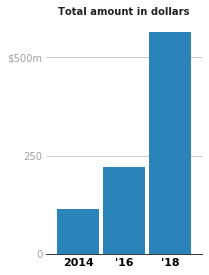

In [114]:
#now finally make the plots!

# make figure
fig2 = plt.figure(figsize=(2.5, 4))
fig2.patch.set(facecolor='white')

#make axes
ax2 = bdata.plot.bar(color='#2A83B9', width=0.9)
ax2.set(facecolor='white')

#customized title
ax2.set_title("Total amount in dollars",
             fontsize='10',fontweight='bold',color='#222222')

#grid
plt.grid(axis='x')#,color='#F1F1F1' makes the vertical bars reappear?

#Tick labels
ax2.set_xticklabels(["2014","'16","'18"], rotation=0,
                  fontsize='11',fontweight='bold')

y_formatter = FixedFormatter(["0","250", "$500m"])
y_locator = FixedLocator([0,250000000, 500000000])
ax2.yaxis.set_major_formatter(y_formatter)
ax2.yaxis.set_major_locator(y_locator)
ax2.set_yticklabels(labels=["0","250", "$500m"],
                    fontsize='10',color='#A2A2A2')

#spines
ax2.spines['bottom'].set_linewidth(1)
ax2.spines['bottom'].set_color('#3C3C3C')

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here